In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import unicodedata
import geopandas as gpd
import get_data
import mapclassify
import contextily as ctx
import numpy as np

In [2]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=24)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=16)

In [3]:
DRS=['DRS 09 - Marília',
 'DRS 15 - São José do Rio Preto',
 'DRS 14 - São João da Boa Vista',
 'DRS 06 - Bauru',
 'DRS 16 - Sorocaba',
 'DRS 11 - Presidente Prudente',
 'DRS 05 - Barretos',
 'DRS 13 - Ribeirão Preto',
 'DRS 02 - Araçatuba',
 'DRS 07 - Campinas',
 'DRS 03 - Araraquara',
 'DRS 17 - Taubaté',
 'DRS 10 - Piracicaba',
 'DRS 01 - Grande São Paulo',
 'DRS 12 - Registro',
 'DRS 04 - Baixada Santista',
 'DRS 08 - Franca']

In [4]:
get_data.get_data()

Baixando arquivos brasil.io...


In [5]:
dfSP = pd.read_csv("../regionsSP/data/dados_municipios_SP.csv")
dfSP = dfSP[dfSP.DRS != "Indefinido"]
dfSP


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,DRS
157,2020-08-01,SP,Adamantina,city,150,6,118,True,35068.0,3500105.0,427.74039,0.0400,DRS 09 - Marília
158,2020-07-31,SP,Adamantina,city,144,6,117,False,35068.0,3500105.0,410.63077,0.0417,DRS 09 - Marília
159,2020-07-30,SP,Adamantina,city,144,6,116,False,35068.0,3500105.0,410.63077,0.0417,DRS 09 - Marília
160,2020-07-29,SP,Adamantina,city,137,6,115,False,35068.0,3500105.0,390.66956,0.0438,DRS 09 - Marília
161,2020-07-28,SP,Adamantina,city,133,6,114,False,35068.0,3500105.0,379.26315,0.0451,DRS 09 - Marília
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58627,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,3533809.0,40.06410,0.0000,DRS 09 - Marília
58628,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,3533809.0,40.06410,0.0000,DRS 09 - Marília
58629,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,3533809.0,40.06410,0.0000,DRS 09 - Marília
58630,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,3533809.0,40.06410,0.0000,DRS 09 - Marília


In [6]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# DRS_Saude_2019.shp

In [7]:
# Set filepath
fp = "DRS_Saude_2019/DRS_Saude_2019.shp"

# Read file using gpd.read_file()
dataSaude = gpd.read_file(fp)
dataSaude

,DRS,COD,geometry
0,DRS XVII - Taubaté,17,"MULTIPOLYGON (((-45.52488 -23.85610, -45.52502..."
1,DRS XIII - Ribeirão Preto,1,"POLYGON ((-48.70617 -21.20653, -48.70584 -21.2..."
2,DRS XI - Presidente Prudente,2,"POLYGON ((-50.94517 -22.67485, -50.94530 -22.6..."
3,DRS VII - Campinas,3,"POLYGON ((-47.19115 -23.26960, -47.19073 -23.2..."
4,DRS VIII - Franca,4,"POLYGON ((-47.14462 -20.54093, -47.14419 -20.5..."
5,DRS IX - Marília,5,"POLYGON ((-49.36970 -22.88280, -49.36948 -22.8..."
6,DRS XVI - Sorocaba,6,"POLYGON ((-48.78815 -24.55728, -48.78804 -24.5..."
7,DRS II - Araçatuba,7,"POLYGON ((-50.06110 -21.58360, -50.06106 -21.5..."
8,DRS III - Araraquara,8,"POLYGON ((-48.44626 -22.06980, -48.44627 -22.0..."
9,DRS XII - Registro,9,"POLYGON ((-47.43388 -24.68846, -47.43439 -24.6..."


In [8]:
dataSaude = dataSaude.to_crs(epsg=3857)

In [9]:
def value(r): 
    if (r == 'I'): 
        return 1
    if (r == 'V'): 
        return 5
    if (r == 'X'): 
        return 10
    if (r == 'L'): 
        return 50
    if (r == 'C'): 
        return 100
    if (r == 'D'): 
        return 500
    if (r == 'M'): 
        return 1000
    return -1
  
def romanToDecimal(str): 
    res = 0
    i = 0
  
    while (i < len(str)): 
  
        # Getting value of symbol s[i] 
        s1 = value(str[i]) 
  
        if (i + 1 < len(str)): 
  
            # Getting value of symbol s[i + 1] 
            s2 = value(str[i + 1]) 
  
            # Comparing both values 
            if (s1 >= s2): 
  
                # Value of current symbol is greater 
                # or equal to the next symbol 
                res = res + s1 
                i = i + 1
            else: 
  
                # Value of current symbol is greater 
                # or equal to the next symbol 
                res = res + s2 - s1 
                i = i + 2
        else: 
            res = res + s1 
            i = i + 1
  
    return res 

In [10]:
for i in range(0,len(dataSaude)):
    numeroDR=dataSaude.iloc[i,0].split(' ',)[1]
    nomeDR=dataSaude.iloc[i,0].split(' ',)[3:]
    nomeDR=' '.join(nomeDR)
    decimalDR=romanToDecimal(numeroDR)
    if decimalDR<10:
        decimalDR="0"+str(decimalDR)
    dataSaude.iloc[i,0]="DRS "+str(decimalDR)+" - "+nomeDR

In [11]:
dataSaude.DRS=[x.upper() for x in dataSaude.DRS]

for i in range(0,len(dataSaude.index)):
    dataSaude.iloc[i,0] = strip_accents(dataSaude.iloc[i,0])
    
display(dataSaude.head(17))

,DRS,COD,geometry
0,DRS 17 - TAUBATE,17,"MULTIPOLYGON (((-5067806.836 -2735883.439, -50..."
1,DRS 13 - RIBEIRAO PRETO,1,"POLYGON ((-5421946.071 -2416522.035, -5421908...."
2,DRS 11 - PRESIDENTE PRUDENTE,2,"POLYGON ((-5671190.705 -2592743.739, -5671204...."
3,DRS 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247...."
4,DRS 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067...."
5,DRS 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784...."
6,DRS 16 - SOROCABA,6,"POLYGON ((-5431072.286 -2821463.514, -5431060...."
7,DRS 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771...."
8,DRS 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014...."
9,DRS 12 - REGISTRO,9,"POLYGON ((-5280315.282 -2837527.685, -5280372...."


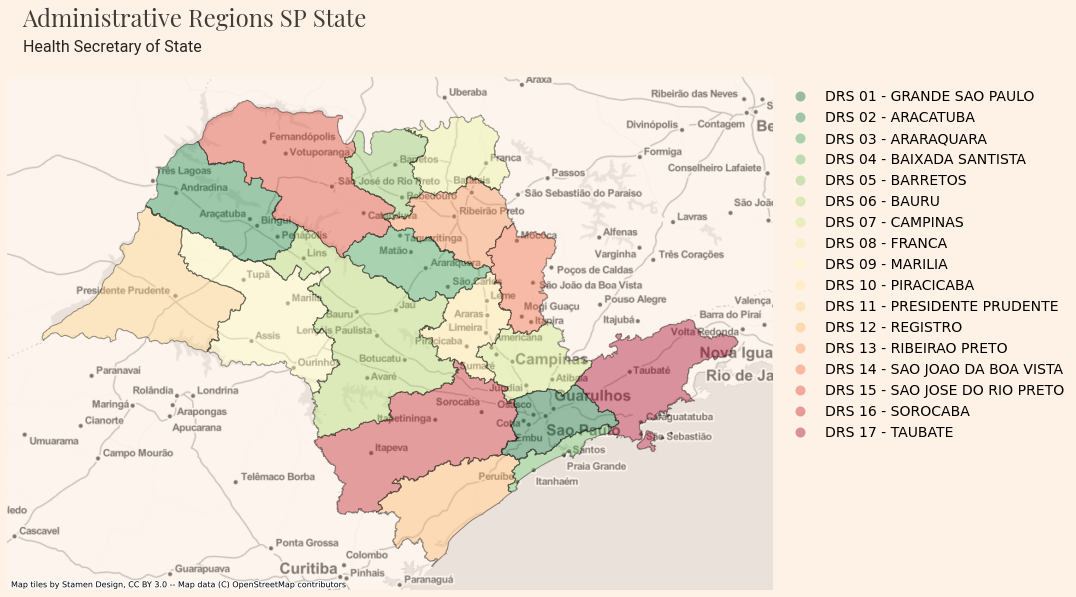

In [12]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='DRS',alpha=0.4,ax=ax,legend=True,cmap='RdYlGn_r', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='upper left',bbox_to_anchor=(1, 1)))

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Administrative Regions SP State",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
plt.text(x = 0.02, y = 1.05,
            s = "Health Secretary of State",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [13]:
def load_confirmed(start_date, districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

def load_dead(start_date, districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

In [14]:
def last_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis) - 1
    return np.where(mask.any(axis=axis), val, invalid_val)

start_date="2020-02-15"
DRS=sorted(DRS)

infected=[]
dead=[]
dateX=[]
for districtRegion in DRS:
    deadX=load_dead(start_date, districtRegion).values
    date=load_dead(start_date, districtRegion).index.values
    lastDead=last_nonzero(deadX,0)[0]
    infectedX=load_confirmed(start_date, districtRegion).values
    lastInfected=last_nonzero(infectedX,0)[0]
    lastRecord=min(lastInfected,lastDead)
    infected.append(infectedX[lastRecord][0])
    dead.append(deadX[lastRecord][0])
    dateX=np.append(dateX,date[lastRecord])
    
dataSaude=dataSaude.sort_values('DRS')  
dataSaude['infected']=pd.Series(infected,index=dataSaude.index)
dataSaude['dead']=pd.Series(dead,index=dataSaude.index)
dataSaude['date']=pd.Series(dateX,index=dataSaude.index)

In [15]:
display(dataSaude)

,DRS,COD,geometry,infected,dead,date
10,DRS 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",306775.0,15667.0,2020-08-01
7,DRS 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",7468.0,201.0,2020-08-01
8,DRS 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",5904.0,97.0,2020-08-01
13,DRS 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",36420.0,1376.0,2020-08-01
16,DRS 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",4311.0,140.0,2020-08-01
12,DRS 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",15224.0,321.0,2020-08-01
3,DRS 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",54204.0,1884.0,2020-08-01
4,DRS 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",3264.0,86.0,2020-08-01
5,DRS 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",5267.0,127.0,2020-08-01
11,DRS 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",19581.0,570.0,2020-08-01


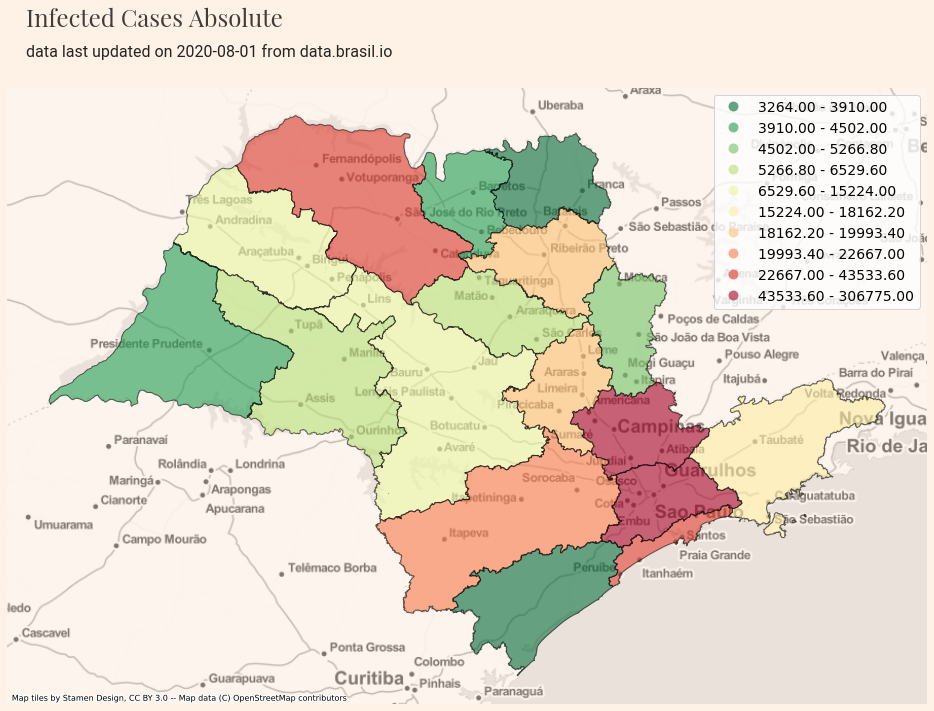

In [16]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='infected',ax=ax,alpha=0.6, legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='best'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected Cases Absolute",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [17]:
dfSP=dfSP.sort_values('DRS') 
dfSP=dfSP.reset_index()

df_confirmed = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['confirmed']
df_deaths = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['deaths']

df_pop = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['popEst']
df_pop = df_pop.max().to_frame().T
display(df_pop)

display(df_pop.values[0])

DRS,DRS 01 - Grande São Paulo,DRS 02 - Araçatuba,DRS 03 - Araraquara,DRS 04 - Baixada Santista,DRS 05 - Barretos,DRS 06 - Bauru,DRS 07 - Campinas,DRS 08 - Franca,DRS 09 - Marília,DRS 10 - Piracicaba,DRS 11 - Presidente Prudente,DRS 12 - Registro,DRS 13 - Ribeirão Preto,DRS 14 - São João da Boa Vista,DRS 15 - São José do Rio Preto,DRS 16 - Sorocaba,DRS 17 - Taubaté
0,21702084.0,791256.0,1025982.0,1865397.0,440907.0,1800757.0,4671287.0,713458.0,1144665.0,1586546.0,775627.0,284509.0,1523682.0,834872.0,1629470.0,2530829.0,2552610.0


array([21702084.,   791256.,  1025982.,  1865397.,   440907.,  1800757.,
        4671287.,   713458.,  1144665.,  1586546.,   775627.,   284509.,
        1523682.,   834872.,  1629470.,  2530829.,  2552610.])

In [18]:
dataSaude['popEst']=pd.Series(df_pop.values[0],index=dataSaude.index)
dataSaude['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deathRatio']=pd.Series(np.array(dead)/np.array(infected)*100,index=dataSaude.index)

In [19]:
dataSaude

,DRS,COD,geometry,infected,dead,date,popEst,infectedPerMi,deadPerMi,deathRatio
10,DRS 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",306775.0,15667.0,2020-08-01,21702084.0,14135.739222,721.912237,5.107000
7,DRS 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",7468.0,201.0,2020-08-01,791256.0,9438.159079,254.026510,2.691484
8,DRS 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",5904.0,97.0,2020-08-01,1025982.0,5754.486921,94.543569,1.642954
13,DRS 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",36420.0,1376.0,2020-08-01,1865397.0,19523.994088,737.644587,3.778144
16,DRS 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",4311.0,140.0,2020-08-01,440907.0,9777.572141,317.527279,3.247506
12,DRS 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",15224.0,321.0,2020-08-01,1800757.0,8454.222308,178.258366,2.108513
3,DRS 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",54204.0,1884.0,2020-08-01,4671287.0,11603.654410,403.314975,3.475758
4,DRS 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",3264.0,86.0,2020-08-01,713458.0,4574.901396,120.539681,2.634804
5,DRS 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",5267.0,127.0,2020-08-01,1144665.0,4601.346245,110.949492,2.411240
11,DRS 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",19581.0,570.0,2020-08-01,1586546.0,12341.904994,359.271020,2.910985


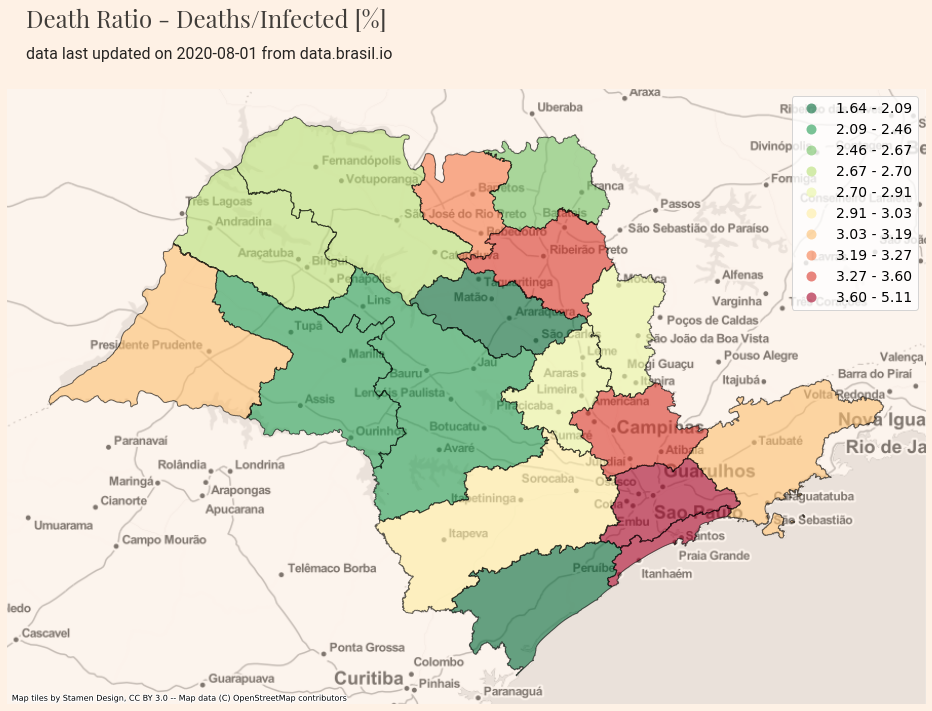

In [20]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='deathRatio',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='best'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Death Ratio - Deaths/Infected [%]",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

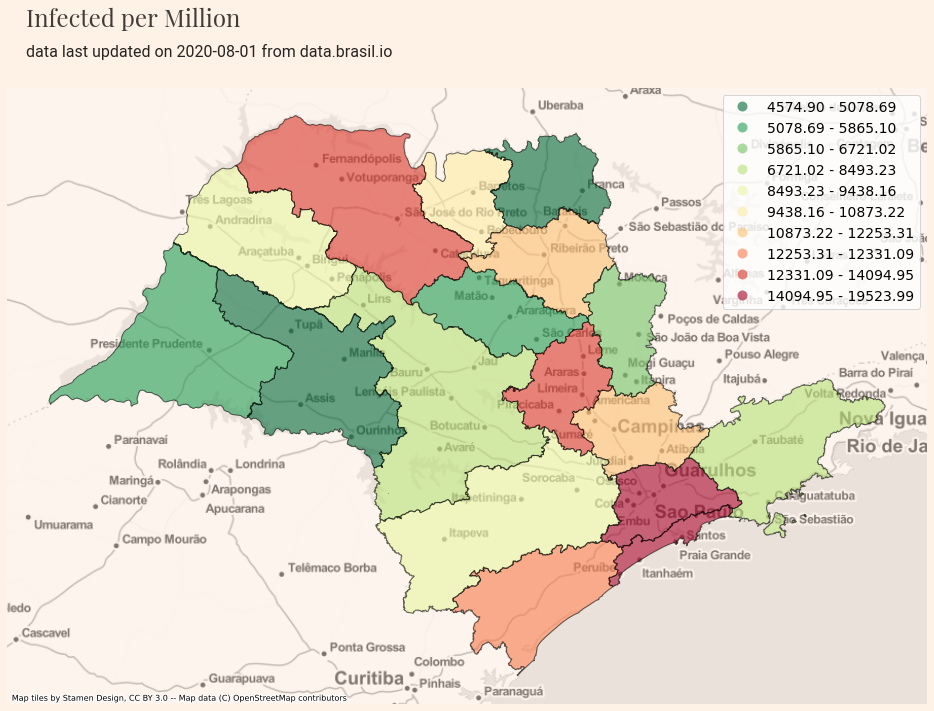

In [21]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='infectedPerMi',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='best'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

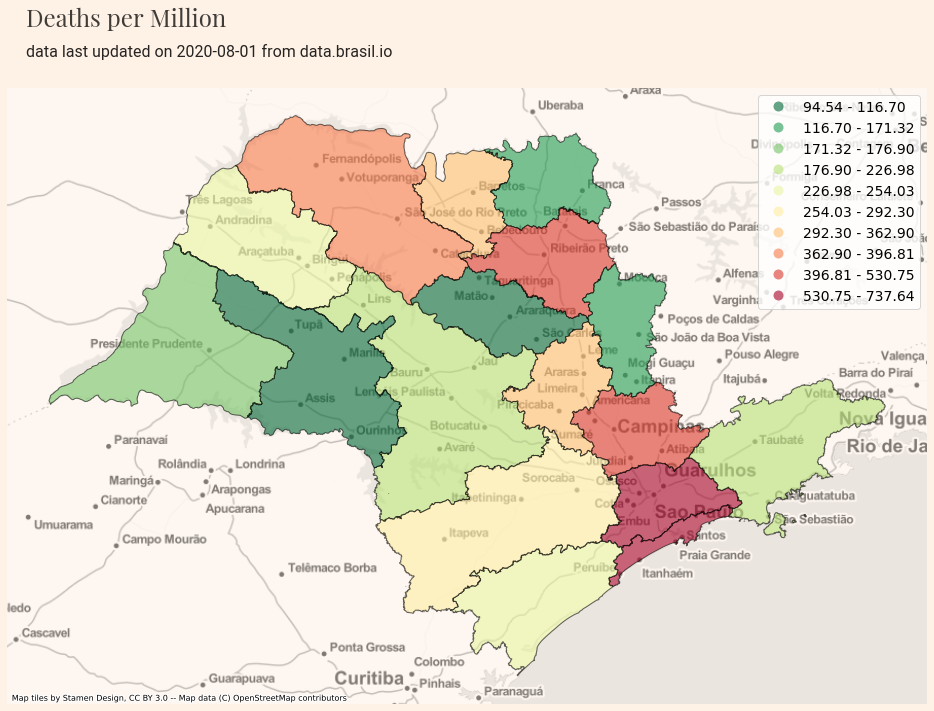

In [22]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='deadPerMi',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='best'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
ax.set_axis_off()
# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Deaths per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [23]:
dataSaude2=dataSaude
dataSaude2=dataSaude2.to_crs(epsg=4326)
centDRS=dataSaude2.centroid

display(centDRS)

gdf = gpd.GeoDataFrame(
    dataSaude2, geometry=centDRS,crs=4326)

# gdf = gdf.to_crs(epsg=4326)
gdf['latitude']=centDRS.y
gdf['longitude']=centDRS.x
gdf['id']=gdf.COD


display(gdf)


10    POINT (-46.53643 -23.59828)
7     POINT (-50.79993 -21.04560)
8     POINT (-48.32567 -21.75431)
13    POINT (-46.52181 -23.98786)
16    POINT (-48.64861 -20.59473)
12    POINT (-48.94345 -22.60998)
3     POINT (-46.81165 -22.91334)
4     POINT (-47.75214 -20.45975)
5     POINT (-50.23746 -22.32535)
11    POINT (-47.59446 -22.48568)
2     POINT (-51.65554 -22.10672)
9     POINT (-47.89129 -24.54053)
1     POINT (-47.74226 -21.23565)
14    POINT (-46.93947 -21.89198)
15    POINT (-49.79711 -20.62409)
6     POINT (-48.25146 -23.81350)
0     POINT (-45.30901 -23.06930)
dtype: geometry

,DRS,COD,geometry,infected,dead,date,popEst,infectedPerMi,deadPerMi,deathRatio,latitude,longitude,id
10,DRS 01 - GRANDE SAO PAULO,10,POINT (-46.53643 -23.59828),306775.0,15667.0,2020-08-01,21702084.0,14135.739222,721.912237,5.107000,-23.598281,-46.536432,10
7,DRS 02 - ARACATUBA,7,POINT (-50.79993 -21.04560),7468.0,201.0,2020-08-01,791256.0,9438.159079,254.026510,2.691484,-21.045601,-50.799931,7
8,DRS 03 - ARARAQUARA,8,POINT (-48.32567 -21.75431),5904.0,97.0,2020-08-01,1025982.0,5754.486921,94.543569,1.642954,-21.754306,-48.325668,8
13,DRS 04 - BAIXADA SANTISTA,13,POINT (-46.52181 -23.98786),36420.0,1376.0,2020-08-01,1865397.0,19523.994088,737.644587,3.778144,-23.987857,-46.521810,13
16,DRS 05 - BARRETOS,16,POINT (-48.64861 -20.59473),4311.0,140.0,2020-08-01,440907.0,9777.572141,317.527279,3.247506,-20.594726,-48.648609,16
12,DRS 06 - BAURU,12,POINT (-48.94345 -22.60998),15224.0,321.0,2020-08-01,1800757.0,8454.222308,178.258366,2.108513,-22.609982,-48.943447,12
3,DRS 07 - CAMPINAS,3,POINT (-46.81165 -22.91334),54204.0,1884.0,2020-08-01,4671287.0,11603.654410,403.314975,3.475758,-22.913343,-46.811645,3
4,DRS 08 - FRANCA,4,POINT (-47.75214 -20.45975),3264.0,86.0,2020-08-01,713458.0,4574.901396,120.539681,2.634804,-20.459745,-47.752138,4
5,DRS 09 - MARILIA,5,POINT (-50.23746 -22.32535),5267.0,127.0,2020-08-01,1144665.0,4601.346245,110.949492,2.411240,-22.325354,-50.237456,5
11,DRS 10 - PIRACICABA,11,POINT (-47.59446 -22.48568),19581.0,570.0,2020-08-01,1586546.0,12341.904994,359.271020,2.910985,-22.485678,-47.594460,11


In [24]:
del gdf['id']
gdf.rename(columns={'COD': 'id'}, inplace=True)
gdf['id']=pd.Series(gdf.index,index=gdf.index)

# 3857
gdf['geometry']=dataSaude.geometry
# gdf=gdf.to_crs(epsg=3857)


display(gdf)

,DRS,id,geometry,infected,dead,date,popEst,infectedPerMi,deadPerMi,deathRatio,latitude,longitude
10,DRS 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",306775.0,15667.0,2020-08-01,21702084.0,14135.739222,721.912237,5.107000,-23.598281,-46.536432
7,DRS 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",7468.0,201.0,2020-08-01,791256.0,9438.159079,254.026510,2.691484,-21.045601,-50.799931
8,DRS 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",5904.0,97.0,2020-08-01,1025982.0,5754.486921,94.543569,1.642954,-21.754306,-48.325668
13,DRS 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",36420.0,1376.0,2020-08-01,1865397.0,19523.994088,737.644587,3.778144,-23.987857,-46.521810
16,DRS 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",4311.0,140.0,2020-08-01,440907.0,9777.572141,317.527279,3.247506,-20.594726,-48.648609
12,DRS 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",15224.0,321.0,2020-08-01,1800757.0,8454.222308,178.258366,2.108513,-22.609982,-48.943447
3,DRS 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",54204.0,1884.0,2020-08-01,4671287.0,11603.654410,403.314975,3.475758,-22.913343,-46.811645
4,DRS 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",3264.0,86.0,2020-08-01,713458.0,4574.901396,120.539681,2.634804,-20.459745,-47.752138
5,DRS 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",5267.0,127.0,2020-08-01,1144665.0,4601.346245,110.949492,2.411240,-22.325354,-50.237456
11,DRS 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",19581.0,570.0,2020-08-01,1586546.0,12341.904994,359.271020,2.910985,-22.485678,-47.594460


In [25]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
HTML("<style> @import url('https://fonts.googleapis.com/css2?family=Playfair+Display&family=Roboto&display=swap');</style>")

In [26]:
import json
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'

geodf = gpd.read_file('DRS_Saude_2019/DRS_Saude_2019.shp')
geodf.to_file("DRS_Saude_2019/DRS.json", driver = "GeoJSON")
with open("DRS_Saude_2019/DRS.json") as geofile:
    jdata = json.load(geofile)

for k in range(len(jdata['features'])):
    jdata['features'][k]['id'] = k

print(jdata['features'][0].keys())
print(jdata['features'][0]['properties'])
    
def figMap(jdata):
    fig=go.Figure(go.Choroplethmapbox(geojson=jdata, locations=gdf['id'],showlegend=False,showscale=False,
                                    z=gdf['id'],colorscale=["white","gray"], #,"black"],
                                    marker_opacity=0.2, marker_line_width=1.5))
    fig.update_layout( mapbox_style="carto-positron", 
                      mapbox_zoom=5.7,     
       mapbox_center = {"lat": (gdf.latitude.max()+gdf.latitude.min())/2, \
                 "lon": (gdf.longitude.max()+gdf.longitude.min())/2},
        geo=dict(showland=False,
            lataxis=dict(range=[gdf.latitude.min(), gdf.latitude.max()]),
            lonaxis=dict(range=[gdf.longitude.min(), gdf.longitude.max()]),
            scope="south america",
            ),
            paper_bgcolor=color_bg,
            plot_bgcolor="gray",
            width=800,
            height=700,
            showlegend=False)
    
    fig.update_layout(mapbox_style="open-street-map")    
#     fig.update_layout( mapbox_style="light", \
#                       mapbox_accesstoken='pk.eyJ1IjoiZ2FzaWx2YTE5NzMiLCJhIjoiY2tjNTNiaXdjMGR5MjJybzZzdHU2bjFrMSJ9.Ni_co0QEn1WVVfefOkbRBg')
    return fig

dict_keys(['type', 'properties', 'geometry', 'id'])
{'DRS': 'DRS XVII - Taubaté', 'COD': 17}


In [27]:
def figPlot(jdata,gdf,propMap,titlePlot,simulation=False):
    
    fig=figMap(jdata)

    fig.add_trace(go.Scattermapbox(
            lat=gdf.latitude,
            lon=gdf.longitude, #size_max=50,
            mode='markers',
            marker=go.scattermapbox.Marker(
                showscale=True, 
                size=gdf[propMap],
                sizemode='area',
                sizeref=0.5*max(gdf[propMap])/(40.**2),
                sizemin=4,
                color = gdf[propMap],
                colorscale = ["green","yellow","orange","red"]
            ),
            text=gdf.DRS,
        ))

    fig.update_geos(fitbounds="locations",visible=False, 
                    resolution=110,
                    showcountries=True, countrycolor="Black",
                    showsubunits=True, subunitcolor="Black")

#     fig.update_layout(mapbox_style="light") #"stamen-terrain") #"open-street-map")

    fig.update_layout(
        geo=dict(
            lataxis=dict(range=[gdf.latitude.min()-3, gdf.latitude.max()+3]),
            lonaxis=dict(range=[gdf.longitude.min()-20, gdf.longitude.max()+1]),
            scope="south america",
            showland = True,
            landcolor = darker_highlight,
            showcoastlines=True, coastlinecolor="RebeccaPurple",
            showocean=True, oceancolor=darker_highlight,
            showlakes=True, lakecolor="Blue",
            showrivers=True, rivercolor="Blue",
            framecolor=darker_highlight,
            ),
#             paper_bgcolor=color_bg,
            plot_bgcolor="gray",
            width=800,
            height=700,
    )
    
    if simulation:
        strTitle="SEAIRD Model Results for Covid-19 - "+titlePlot
        strSub="Situation for the day "+str(gdf.date.max())
        model='Model'
    else:
        strTitle="Brazil States Covid-19 "+titlePlot
        strSub='Last updated from data.brasil.io on '+str(gdf.date.max()) 
        model=""

    fig.update_layout(title=go.layout.Title(text=strTitle, 
                font=dict(
                family="Playfair Display, serif",
                size=24            )))
    
    fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text=strSub,
            xanchor='left',
            x=-.065,
#             xshift=275,
            yanchor='top',
             y=1.075,
            font=dict(
                family='Roboto, sans-serif',
                size=16            )
        )])
    
    fig['layout']['xaxis'].update(side='top')

    fig.write_html('results/'+propMap+model+'.html') #, auto_open=True)
    fig.write_image('results/'+propMap+model+'.png',scale=2)
#     fig.show("notebook")

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

In [29]:
figPlot(jdata,gdf,propMap="infectedPerMi",titlePlot="Infected per Million")
IFrame(src='results/infectedPerMi.html', width=800, height=700)

In [30]:
figPlot(jdata,gdf,propMap="deadPerMi",titlePlot="Deaths per Million")
IFrame(src='results/deadPerMi.html', width=800, height=700)

In [31]:
figPlot(jdata,gdf,propMap="deathRatio",titlePlot="Death Ratio [%]")
IFrame(src='results/deathRatio.html', width=800, height=700)

In [32]:
# SEAIRD_SP7.pkl

def loadDataFrame(filename):
    df= pd.read_pickle(filename)
    df.columns = [c.lower().replace(' ', '_') for c in df.columns]
    df.columns = [c.lower().replace('(', '') for c in df.columns]
    df.columns = [c.lower().replace(')', '') for c in df.columns]
    return df

In [38]:
dfparam = pd.read_csv("data/param_optimized_Yabox_HistMin.csv")
dfparam = dfparam.dropna()
DRS=[]

for i in range(0,len(dfparam)):
    DRS.append(strip_accents(dfparam.DRS[i]).upper())

display(dfparam)
display(DRS)

version="8"
date="2020-09-01"

display(gdf)

,DRS,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,DRS 01 - Grande São Paulo,2020-03-18,200,7840120,0,0,136,0,196,117,0.15,0.4950,0.0081
1,DRS 02 - Araçatuba,2020-03-29,200,282699,0,0,182,0,51,5,0.15,0.6257,0.0362
2,DRS 03 - Araraquara,2020-03-30,200,377711,0,0,534,0,102,93,0.15,0.5056,0.0034
3,DRS 04 - Baixada Santista,2020-04-01,200,718013,0,0,270,0,281,155,0.15,0.4062,0.0124
4,DRS 05 - Barretos,2020-04-03,200,147064,0,0,883,0,14,105,0.15,0.3535,0.0211
5,DRS 06 - Bauru,2020-04-01,200,717995,0,0,263,0,201,59,0.15,0.5443,0.0304
6,DRS 07 - Campinas,2020-03-29,200,1865626,0,0,602,0,9,20,0.15,0.5461,0.0282
7,DRS 08 - Franca,2020-04-01,200,237187,0,0,37,0,26,3,0.15,0.4088,0.0257
8,DRS 09 - Marília,2020-03-30,200,456106,0,0,292,0,241,22,0.15,0.5710,0.0187
9,DRS 10 - Piracicaba,2020-04-02,200,493679,0,0,384,0,119,142,0.15,0.4715,0.0408


['DRS 01 - GRANDE SAO PAULO',
 'DRS 02 - ARACATUBA',
 'DRS 03 - ARARAQUARA',
 'DRS 04 - BAIXADA SANTISTA',
 'DRS 05 - BARRETOS',
 'DRS 06 - BAURU',
 'DRS 07 - CAMPINAS',
 'DRS 08 - FRANCA',
 'DRS 09 - MARILIA',
 'DRS 10 - PIRACICABA',
 'DRS 11 - PRESIDENTE PRUDENTE',
 'DRS 12 - REGISTRO',
 'DRS 13 - RIBEIRAO PRETO',
 'DRS 14 - SAO JOAO DA BOA VISTA',
 'DRS 15 - SAO JOSE DO RIO PRETO',
 'DRS 16 - SOROCABA',
 'DRS 17 - TAUBATE']

,DRS,id,geometry,infected,dead,date,popEst,infectedPerMi,deadPerMi,deathRatio,latitude,longitude
10,DRS 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",306775.0,15667.0,2020-08-01,21702084.0,14135.739222,721.912237,5.107000,-23.598281,-46.536432
7,DRS 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",7468.0,201.0,2020-08-01,791256.0,9438.159079,254.026510,2.691484,-21.045601,-50.799931
8,DRS 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",5904.0,97.0,2020-08-01,1025982.0,5754.486921,94.543569,1.642954,-21.754306,-48.325668
13,DRS 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",36420.0,1376.0,2020-08-01,1865397.0,19523.994088,737.644587,3.778144,-23.987857,-46.521810
16,DRS 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",4311.0,140.0,2020-08-01,440907.0,9777.572141,317.527279,3.247506,-20.594726,-48.648609
12,DRS 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",15224.0,321.0,2020-08-01,1800757.0,8454.222308,178.258366,2.108513,-22.609982,-48.943447
3,DRS 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",54204.0,1884.0,2020-08-01,4671287.0,11603.654410,403.314975,3.475758,-22.913343,-46.811645
4,DRS 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",3264.0,86.0,2020-08-01,713458.0,4574.901396,120.539681,2.634804,-20.459745,-47.752138
5,DRS 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",5267.0,127.0,2020-08-01,1144665.0,4601.346245,110.949492,2.411240,-22.325354,-50.237456
11,DRS 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",19581.0,570.0,2020-08-01,1586546.0,12341.904994,359.271020,2.910985,-22.485678,-47.594460


In [39]:
import pandas as pd

dfResults = pd.DataFrame()
data = []
columns = ['date','id','DRS','infected','deaths','popEst','infectedPerMi',
           'deathsPerMi','deathRatio','latitude','longitude']

i=0
for districtRegion in DRS:
    df = loadDataFrame('./data/SEAIRD_sigmaOpt_'+dfparam.iloc[i,0]+'.pkl')    
    df=df[df.index==date]
    
    values = [date, gdf[gdf.DRS==districtRegion].id.values[0],districtRegion, df.infected.values[0], 
             df.deaths.values[0],gdf[gdf.DRS==districtRegion].popEst.values[0],
             df.infected.values[0]/gdf[gdf.DRS==districtRegion].popEst.values[0]*1e6,
             abs(df.deaths.values[0])/gdf[gdf.DRS==districtRegion].popEst.values[0]*1e6,
             np.divide(abs(df.deaths.values[0]),df.infected.values[0])*100,
             gdf[gdf.DRS==districtRegion].latitude.values[0],
             gdf[gdf.DRS==districtRegion].longitude.values[0]
             ]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
    i+=1
    
dfResults = dfResults.append(data, True)

display(dfResults)

,date,id,DRS,infected,deaths,popEst,infectedPerMi,deathsPerMi,deathRatio,latitude,longitude
0,2020-09-01,10,DRS 01 - GRANDE SAO PAULO,297943.513017,16805.171418,21702084.0,13728.797337,774.357496,5.640388,-23.598281,-46.536432
1,2020-09-01,7,DRS 02 - ARACATUBA,13318.230227,750.089704,791256.0,16831.758909,947.973480,5.632052,-21.045601,-50.799931
2,2020-09-01,8,DRS 03 - ARARAQUARA,10094.906560,349.025674,1025982.0,9839.262833,340.186937,3.457443,-21.754306,-48.325668
3,2020-09-01,13,DRS 04 - BAIXADA SANTISTA,33861.255250,2757.392556,1865397.0,18152.304978,1478.180010,8.143208,-23.987857,-46.521810
4,2020-09-01,16,DRS 05 - BARRETOS,5806.646150,424.510906,440907.0,13169.775373,962.812806,7.310776,-20.594726,-48.648609
5,2020-09-01,12,DRS 06 - BAURU,22998.643184,1094.614313,1800757.0,12771.652802,607.863423,4.759473,-22.609982,-48.943447
6,2020-09-01,3,DRS 07 - CAMPINAS,73534.501871,6629.475330,4671287.0,15741.807744,1419.196750,9.015462,-22.913343,-46.811645
7,2020-09-01,4,DRS 08 - FRANCA,7123.535794,359.071119,713458.0,9984.520173,503.282771,5.040631,-20.459745,-47.752138
8,2020-09-01,5,DRS 09 - MARILIA,9590.483851,267.999881,1144665.0,8378.419757,234.129532,2.794435,-22.325354,-50.237456
9,2020-09-01,11,DRS 10 - PIRACICABA,22910.661008,1898.896397,1586546.0,14440.590445,1196.874466,8.288265,-22.485678,-47.594460


In [43]:
figPlot(jdata,dfResults,propMap="infectedPerMi",titlePlot="Infected per Million",simulation=True)
IFrame(src='results/infectedPerMiModel.html', width=800, height=700)

In [44]:
figPlot(jdata,dfResults,propMap="deathsPerMi",titlePlot="Deaths per Million",simulation=True)
IFrame(src='results/deathsPerMiModel.html', width=800, height=700)

In [45]:
figPlot(jdata,dfResults,propMap="deathRatio",titlePlot="Death Ratio [%]",simulation=True)
IFrame(src='results/deathRatioModel.html', width=800, height=700)